In [1]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf
from utils import decorate, make_mixture, make_poisson_pmf
from scipy.stats import gamma, poisson

In the 2014 FIFA World Cup, Germany played Brazil in a semifinal match. Germany scored after 11 minutes and again at the 23 minute mark. At that point in the match, how many goals would you expect Germany to score after 90 minutes? What was the probability that they would score 5 more goals (as, in fact, they did)?

Here are the steps I recommend:

    Starting with the same gamma prior we used in the previous problem, compute the likelihood of scoring a goal after 11 minutes for each possible value of lam. Don’t forget to convert all times into games rather than minutes.

    Compute the posterior distribution of lam for Germany after the first goal.

    Compute the likelihood of scoring another goal after 12 more minutes and do another update. Plot the prior, posterior after one goal, and posterior after two goals.

    Compute the posterior predictive distribution of goals Germany might score during the remaining time in the game, 90-23 minutes. Note: You will have to think about how to generate predicted goals for a fraction of a game.

    Compute the probability of scoring 5 or more goals during the remaining time.


In [ ]:
def expo_pdf(t, lams):
    return lams * np.exp(-lams * t)

In [14]:
def update_expo(pmf, data):
    '''
    data is time between goals in minutes
    '''
    t = data / 90 # this is the conversion from minutes to games. 
    lams = pmf.qs
    likelihood = expo_pdf(t, lams)
    pmf *= likelihood
    pmf.normalize()


In [6]:
alpha = 1.4
lams = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(lams)


In [22]:
prior = Pmf(ps, lams)
prior.normalize()
prior

,probs
0.0,0.000000
0.1,0.041053
0.2,0.049015
0.3,0.052160
0.4,0.052952
...,...
9.6,0.000019
9.7,0.000017
9.8,0.000016
9.9,0.000014


In [15]:
germany = prior.copy()
update_expo(germany, 11)
germany

,probs
0.0,0.000000
0.1,0.003780
0.2,0.008916
0.3,0.014060
0.4,0.018800
...,...
9.6,0.000053
9.7,0.000048
9.8,0.000043
9.9,0.000039


<Axes: >

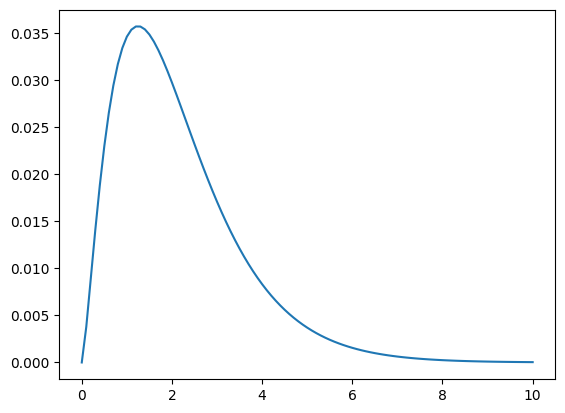

In [16]:
germany.plot()

In [17]:
germany2 = germany.copy()
update_expo(germany2, 12)

In [19]:
germany.mean(), germany2.mean()

(np.float64(2.13588826530869), np.float64(2.703059034926364))

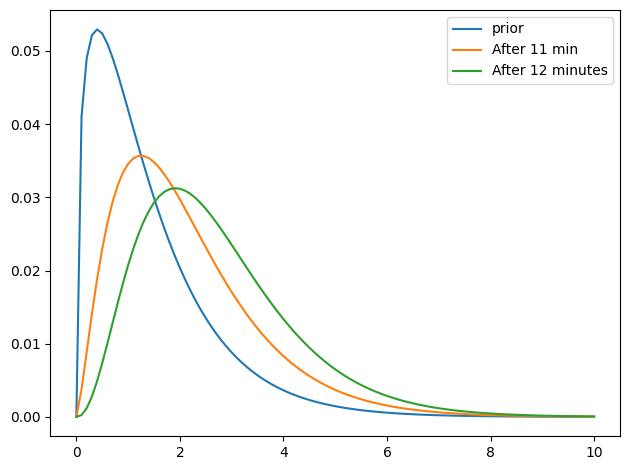

In [23]:
prior.plot(label='prior')
germany.plot(label='After 11 min')
germany2.plot(label='After 12 minutes')
decorate()